In [36]:
import pandas as pd 
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
# reading the csv file from the local machine 
crimes = pd.read_csv('ChicagoCrimes.csv')
crimes.head(5)

C:\Users\19405\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [92]:
# printing the list of all columns
crimes.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [93]:
# dropping the unwanted columns
crimes.drop(columns = ['ID','Case Number','Block','Beat','IUCR','Ward','Community Area','Updated On'],inplace=True)

In [94]:

crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7069282 entries, 0 to 7069281
Data columns (total 14 columns):
Date                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
District                float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(5), int64(1), object(6)
memory usage: 660.7+ MB


In [95]:
# shape represent the number of rows and number of columns  in the dataset
crimes.shape

(7069282, 14)

## Features of the Dataset

In [96]:
print('Features of the Dataset are :',list(crimes.columns))

Features of the Dataset are : ['Date', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'District', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude', 'Location']


## Number of distinct crimes in chicago

In [97]:
# different types of crimes that we see in the dataset
print('Number of Distinct crimes : ',crimes['Primary Type'].nunique())
print('Distinct crimes in Chicago : ',list(crimes['Primary Type'].unique()))


Number of Distinct crimes :  35
Distinct crimes in Chicago :  ['DECEPTIVE PRACTICE', 'CRIM SEXUAL ASSAULT', 'BURGLARY', 'THEFT', 'OFFENSE INVOLVING CHILDREN', 'CRIMINAL DAMAGE', 'OTHER OFFENSE', 'NARCOTICS', 'SEX OFFENSE', 'BATTERY', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'ASSAULT', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION', 'OBSCENITY', 'NON-CRIMINAL', 'PUBLIC PEACE VIOLATION', 'LIQUOR LAW VIOLATION', 'PROSTITUTION', 'INTIMIDATION', 'ARSON', 'INTERFERENCE WITH PUBLIC OFFICER', 'GAMBLING', 'STALKING', 'KIDNAPPING', 'OTHER NARCOTIC VIOLATION', 'CONCEALED CARRY LICENSE VIOLATION', 'HOMICIDE', 'RITUALISM', 'HUMAN TRAFFICKING', 'PUBLIC INDECENCY', 'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'DOMESTIC VIOLENCE']


## Missing values in the Dataset

In [98]:
print('The Number of missing values in the Dataset are :',crimes.isna().sum().sum())

The Number of missing values in the Dataset are : 345286


In [99]:
print('The number of missing values by columns',crimes.isnull().sum())

The number of missing values by columns Date                        0
Primary Type                0
Description                 0
Location Description     6239
Arrest                      0
Domestic                    0
District                   47
FBI Code                    0
X Coordinate            67800
Y Coordinate            67800
Year                        0
Latitude                67800
Longitude               67800
Location                67800
dtype: int64


Text(0, 0.5, 'Number of Missing Values')

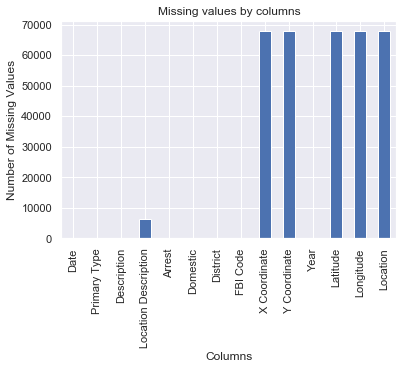

In [100]:
sns.set()
crimes.isnull().sum().plot(kind='bar')
plt.title('Missing values by columns')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')

Inspecting the features, we see that all the features that have a large count of missing values are features that relate to the geographical location of the crime scene. This is No Surprise as the Chicago Crime Dataset is based on first hand accounts of people involved in or around the crime. It is not necessary that such first hand reports need to contain the specific locations of the crime.

We have 3,45,286 missing values in the whole dataset that are present in Location Description, Community, X Co-ordinate, Y Co-ordinate, Latitude, Longitude and Location.
Since, these features are not direct numeric values, we can't use summary statistical functions to fill in the missing values.


__Hence, we shall be removing these values from the dataset.__


In [101]:
# simpliest way to drop all the null values here as follows:
crimes = crimes.dropna()
crimes.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997332 entries, 60332 to 7069279
Data columns (total 14 columns):
Date                    6997332 non-null object
Primary Type            6997332 non-null object
Description             6997332 non-null object
Location Description    6997332 non-null object
Arrest                  6997332 non-null bool
Domestic                6997332 non-null bool
District                6997332 non-null float64
FBI Code                6997332 non-null object
X Coordinate            6997332 non-null float64
Y Coordinate            6997332 non-null float64
Year                    6997332 non-null int64
Latitude                6997332 non-null float64
Longitude               6997332 non-null float64
Location                6997332 non-null object
dtypes: bool(2), float64(5), int64(1), object(6)
memory usage: 707.4+ MB


In [102]:
# percentage of data retained after removal of all the null values
print(round(6997332 / 7069282  * 100,2), "percentage of the data has been retained.")

98.98 percentage of the data has been retained.


In [103]:
# Numerical columns in the dataset 
num = crimes._get_numeric_data().columns
print('The features containing the numerical values : ',list(num))
print('The categorical Data columns :',list(set(crimes.columns)-set(num)))

The features containing the numerical values :  ['Arrest', 'Domestic', 'District', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude']
The categorical Data columns : ['Description', 'Date', 'FBI Code', 'Location', 'Primary Type', 'Location Description']


In [112]:
# converted the Date column into datetime type and extracted the Year,Month,Day,Hour,Day Of Week
crimes.Date = pd.to_datetime(crimes.Date,format ='%m/%d/%Y %I:%M:%S %p')
def date(data):
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day
    data['Hour'] = data['Date'].dt.hour
    data['Day Of Week'] = data['Date'].dt.dayofweek
    return data
date(crimes)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Day Of Week
60332,2019-01-03 19:20:00,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,16.0,26,1100374.0,1943906.0,2019,42.002816,-87.906094,"(42.002816387, -87.90609433)",1,3,19,3
62258,2019-03-16 17:58:00,BATTERY,SIMPLE,STREET,False,False,1.0,08B,1174723.0,1900866.0,2019,41.883369,-87.633860,"(41.88336939, -87.633860272)",3,16,17,5
62600,2019-03-12 22:00:00,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,2.0,06,1182276.0,1879784.0,2019,41.825347,-87.606781,"(41.825346902, -87.606780575)",3,12,22,1
62633,2019-03-14 18:42:00,BATTERY,SIMPLE,RESIDENCE,False,False,24.0,08B,1163827.0,1949311.0,2019,42.016542,-87.672499,"(42.016541612, -87.672499325)",3,14,18,3
62634,2019-03-14 16:03:00,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,True,2.0,26,1182227.0,1879766.0,2019,41.825299,-87.606961,"(41.825298645, -87.6069609)",3,14,16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7069274,2015-03-18 04:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,25.0,08B,1151659.0,1921038.0,2015,41.939208,-87.718022,"(41.939207846, -87.718021657)",3,18,4,2
7069275,2015-03-18 17:08:00,ASSAULT,SIMPLE,RESTAURANT,True,False,16.0,08A,1138222.0,1928502.0,2015,41.959944,-87.767226,"(41.959943835, -87.767225719)",3,18,17,2
7069277,2019-05-26 17:13:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,10.0,26,1152126.0,1893208.0,2019,41.862830,-87.717040,"(41.862830429, -87.717040084)",5,26,17,6
7069278,2019-05-26 06:48:00,HOMICIDE,FIRST DEGREE MURDER,CHA PARKING LOT,True,False,12.0,01A,1167752.0,1893853.0,2019,41.864278,-87.659660,"(41.864278228, -87.659660218)",5,26,6,6


In [113]:
# replacing the columns of boolean containing true or false to 1 and 0
crimes.replace({True : 1,
                False : 0
               },inplace = True)

In [122]:
# since we have incomplete data in 2001.so lets filter the data which consists between 2002-2020.
crimes = crimes[(crimes['Year']>2001)]

In [121]:
# saving into csv file 
crimes.to_csv('cleaned_ChicagoCrimes.csv', index = True, header = 'True')
crimes.to_pickle('cleaned_ChicagoCrimes.pkl')